In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
X, ye=make_blobs(n_samples=400,centers=3,cluster_std=2.7,random_state=42)

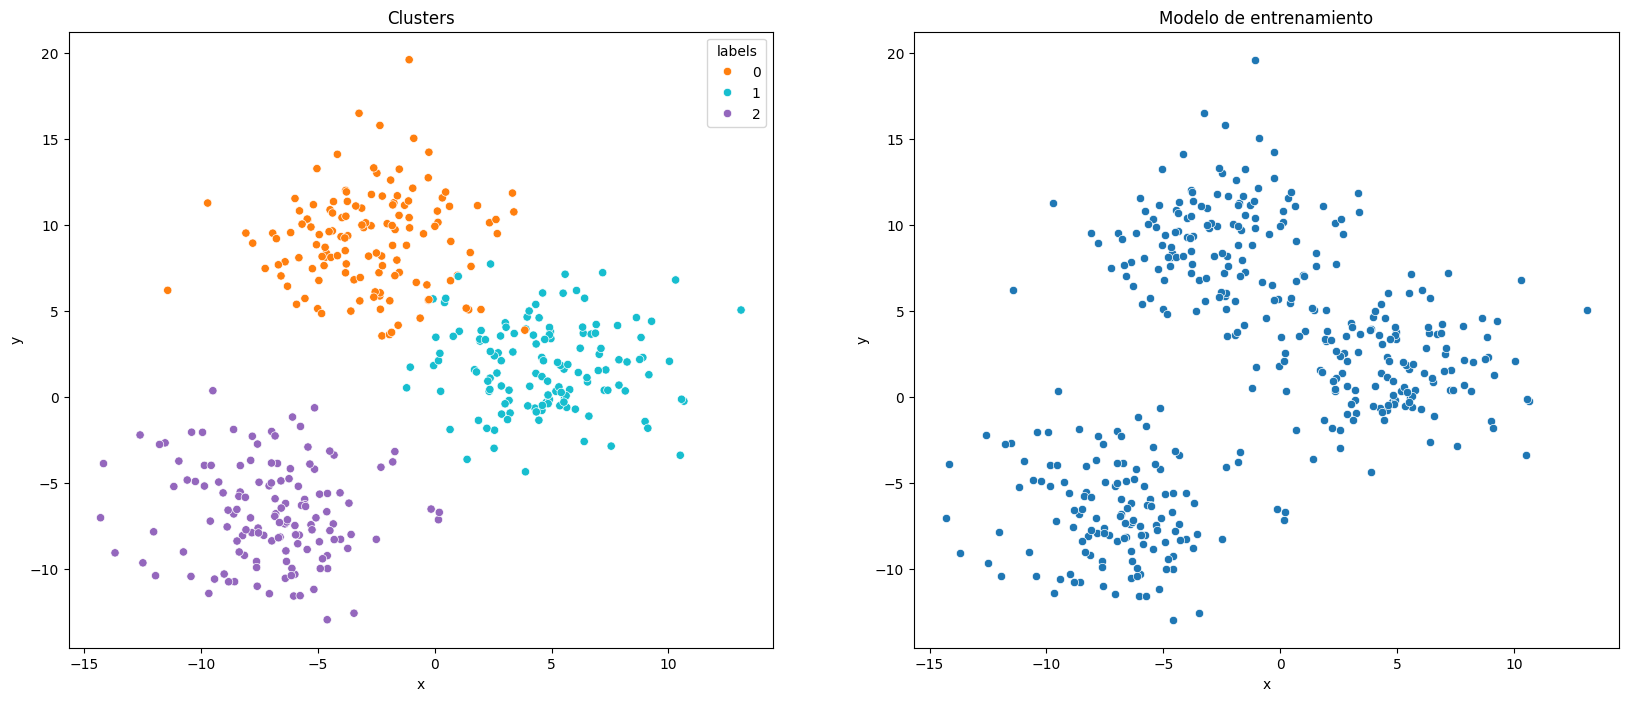

In [4]:
f, l=make_blobs(n_samples=400,centers=3,cluster_std=2.75,random_state=42)

def scatter_plots(df,palette):
  fig, ax=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(20,8))
  fig.subplots_adjust(hspace=0.5, wspace=0.2)

  ax1=plt.subplot(1,2,1)
  sns.scatterplot(ax=ax1,data=df,x='x',y='y',hue='labels',palette=palette)
  plt.title('Clusters')

  ax2=plt.subplot(1,2,2)
  sns.scatterplot(ax=ax2,data=df,x='x',y='y')
  plt.title('Modelo de entrenamiento')

palette={1:"tab:cyan",0:"tab:orange",2:"tab:purple"}
df=pd.DataFrame(f,columns=['x','y'])
df['labels']=l
scatter_plots(df,palette)

Preprocesamiento

In [5]:
scaler=StandardScaler()
scaled_f=scaler.fit_transform(f)
#Datos entrenados
X=scaled_f
#Etiquetas predictivas
y=l

X_train, X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

Entrenamiento del modelo

In [6]:
kmeans=KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)

kmeans.fit(X_train)
print(f'Converge después de {kmeans.n_iter_} iteraciones')

Converge después de 7 iteraciones


Visualizar predicciones

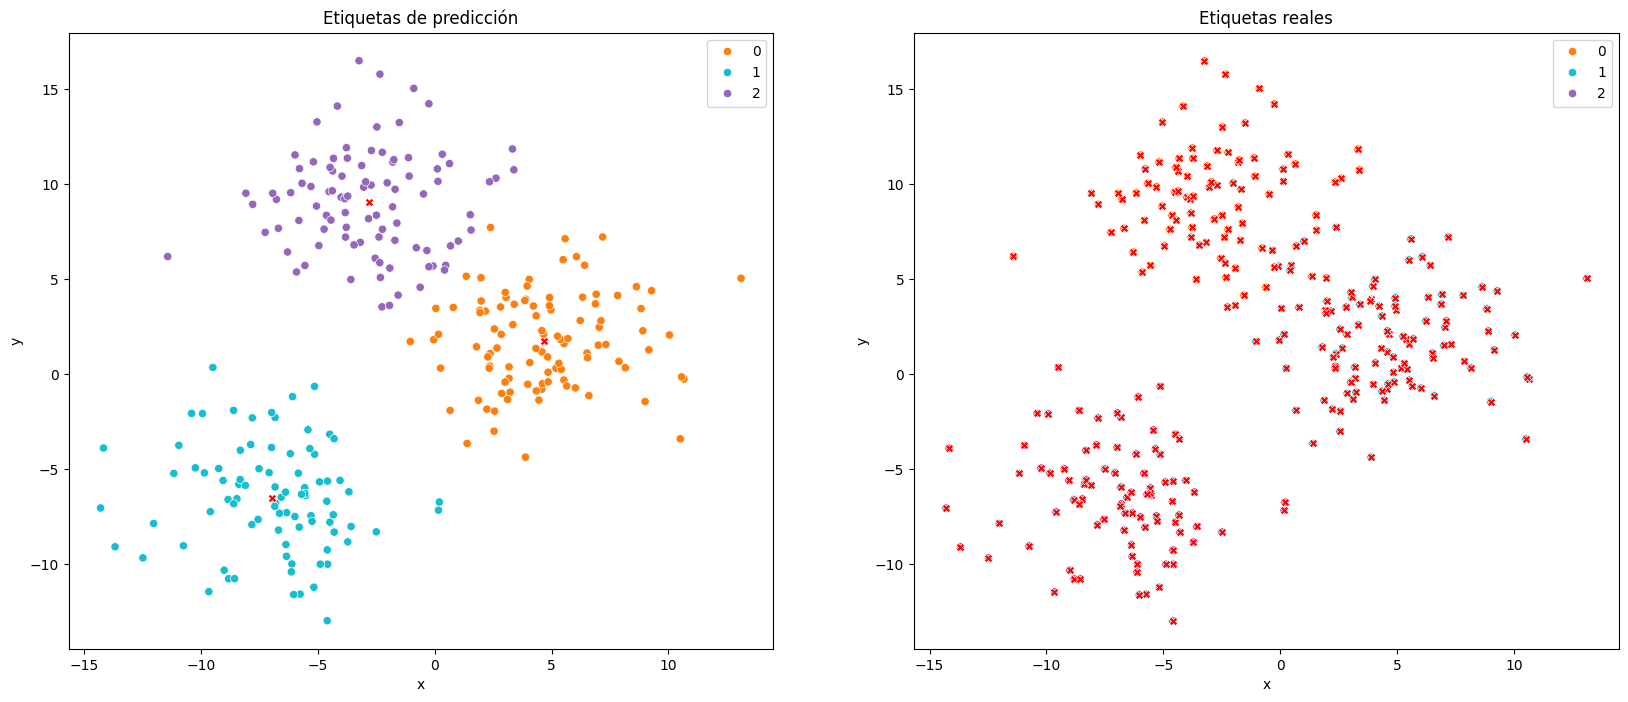

In [7]:
cluster_center=scaler.inverse_transform(kmeans.cluster_centers_)
df_cluster_centers=pd.DataFrame(cluster_center,columns=['x','y'])

X_train_unscaled=scaler.inverse_transform(X_train)
df_train=pd.DataFrame(X_train_unscaled,columns=['x','y'])
df_train['pred_label']=kmeans.labels_
df_train['true_label']=y_train

def scatter_plots(df,cc,palette):
  fig, ax=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(20,8))
  fig.subplots_adjust(hspace=0.5,wspace=0.2)

  ax2=plt.subplot(1,2,1)
  sns.scatterplot(ax=ax2,data=df,x='x',y='y',hue='pred_label',palette=palette)
  sns.scatterplot(ax=ax2,data=cc,x='x',y='y',color='r',marker="X")
  plt.title('Etiquetas de predicción')

  ax1=plt.subplot(1,2,2)
  sns.scatterplot(ax=ax1,data=df,x='x',y='y',hue='true_label',palette=palette)
  sns.scatterplot(ax=ax1,data=df,x='x',y='y',color='r',marker="X")
  plt.title('Etiquetas reales')

palette={1:"tab:cyan",0:"tab:orange",2:"tab:purple"}
scatter_plots(df_train,df_cluster_centers, palette)

In [8]:
df_eval=df_train.copy()

In [9]:
df_eval["true_label"]=df_eval["true_label"].map({0:"A",1:"B",2:"C"})

In [10]:
df_eval["pred_label"]=df_eval["pred_label"].map({0:"B",1:"A",2:"C"})

In [11]:
df_eval.head(15)

,x,y,pred_label,true_label
0,-9.007547,-10.302910,A,C
1,1.009238,7.009681,C,B
2,-6.565501,-6.466780,A,C
3,2.389772,7.727235,B,B
4,-5.422666,-2.915796,A,C
5,-12.024305,-7.846772,A,C
6,-4.006250,9.319323,C,A
7,-6.297788,6.435267,C,A
8,2.169238,3.325947,B,B
9,-5.140506,-4.205585,A,C
